<a href="https://colab.research.google.com/github/jprivera98/Hoja-de-trabajo-3/blob/main/Proyecto_Final_Tex_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Descargando recursos de NLTK...
Recursos de NLTK descargados exitosamente

INICIANDO CARGA Y ANÁLISIS DE DATOS
Verificando archivo en: /content/drive/MyDrive/Archivos proyecto final colab /tw_source.csv
✅ Archivo CSV encontrado
📊 Tamaño del archivo: 227.74 MB
📂 Cargando archivo CSV...
❌ Error de codificación. Intentando con diferentes encodings...
✅ Archivo cargado con encoding: latin1

EXPLORACIÓN INICIAL DEL DATASET

📊 Información general:
   - Tamaño: 1,599,999 filas × 6 columnas
   - Memoria: 507.20 MB

📋 Columnas disponibles:
    1. 0                         | int64      | 2 únicos
    2. 1467810369                | int64      | 1,598,314 únicos
    3. Mon Apr 06 22:19:45 PDT 2009 | object     | 774,362 únicos
    4. NO_QUERY                  | object     | 1 únicos
    5. _TheSpecialOne_           | object     | 659,775 únicos
 

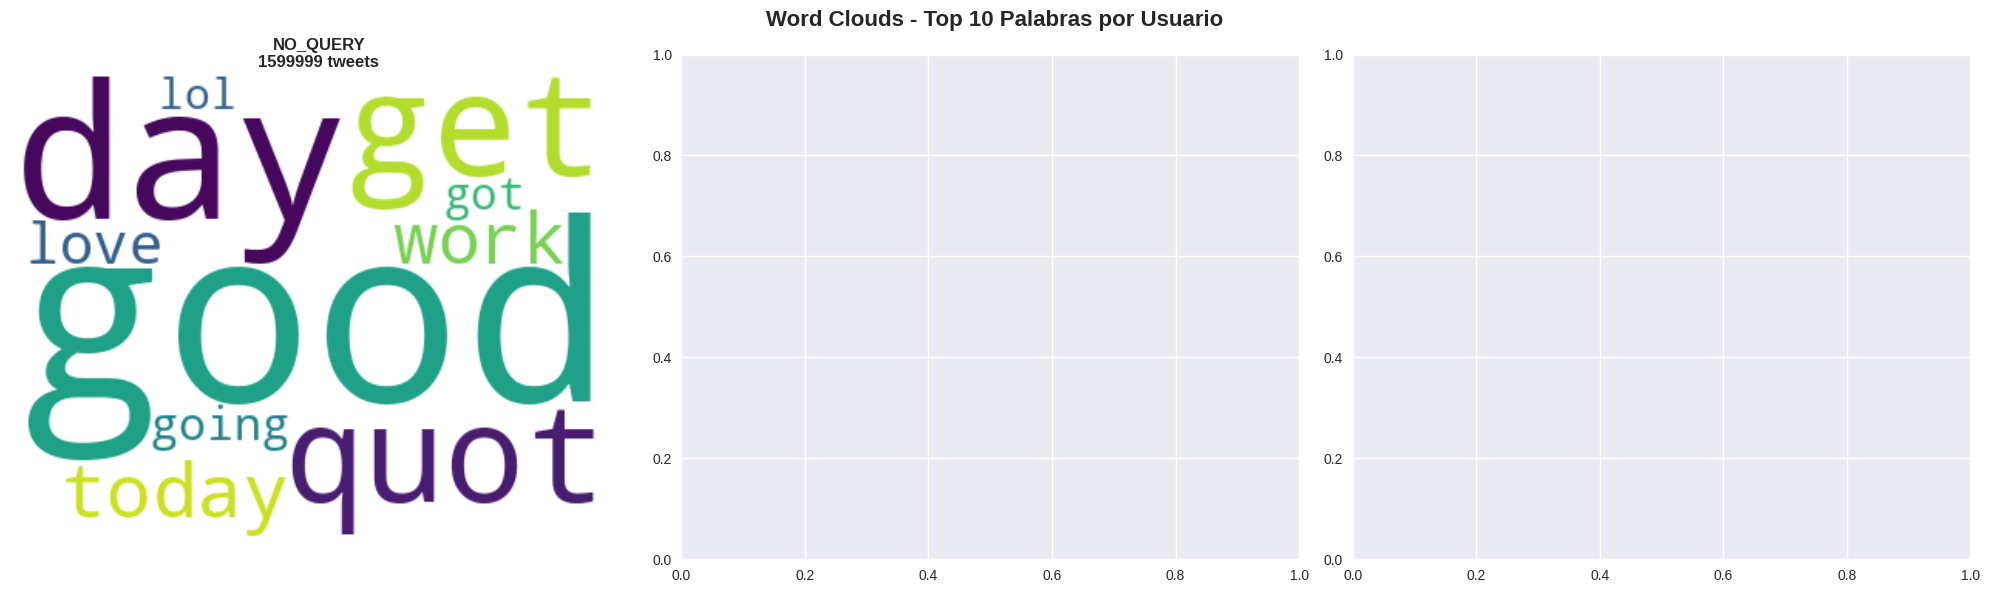


ANÁLISIS DE CONTEXTO Y POPULARIDAD

🔍 ¿Razón por la que citan a estos usuarios?

👤 Usuario: NO_QUERY
   📝 Temas principales en sus tweets:
      • good: 91326 veces
      • day: 89501 veces
      • get: 82150 veces
      • quot: 72085 veces
      • today: 68207 veces
      • work: 64935 veces
      • love: 64686 veces
   📊 Longitud promedio de tweets: 74.1 caracteres

RESUMEN FINAL
✅ Análisis completado exitosamente
✅ Dataset procesado: 1,599,999 tweets
✅ Usuarios analizados: 1
✅ Corpus creados con Content y Metadata completos
✅ Word Clouds generados para visualización
✅ Análisis contextual de popularidad realizado

📋 Corpus finales creados:
   • NO_QUERY: 10284872 palabras procesadas


In [1]:
# Análisis de Word Cloud para Dataset de Tweets - Versión Mejorada
# Extracción y procesamiento de datos desde archivo ZIP

# Primero verifico y monto Google Drive
print("Montando Google Drive...")
from google.colab import drive
drive.mount('/content/drive')

# Importo todas las librerías necesarias
import pandas as pd
import numpy as np
import os
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings

# Configuro warnings y estilo
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Descargo recursos de NLTK necesarios
print("Descargando recursos de NLTK...")
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize
    print("Recursos de NLTK descargados exitosamente")
except Exception as e:
    print(f"Advertencia con NLTK: {e}")

# Defino la ruta del archivo CSV
csv_path = '/content/drive/MyDrive/Archivos proyecto final colab /tw_source.csv'

print(f"\n{'='*60}")
print("INICIANDO CARGA Y ANÁLISIS DE DATOS")
print(f"{'='*60}")

# Función para verificar y cargar archivo CSV directamente
def cargar_datos_csv(ruta_csv):
    """
    Función robusta para cargar CSV directamente
    """
    df = None

    print(f"Verificando archivo en: {ruta_csv}")

    # Verifico si el archivo existe
    if not os.path.exists(ruta_csv):
        print("❌ Error: El archivo CSV no existe en la ruta especificada")

        # Busco archivos similares en el directorio
        directorio = os.path.dirname(ruta_csv)
        if os.path.exists(directorio):
            print(f"Archivos disponibles en {directorio}:")
            archivos = os.listdir(directorio)
            archivos_csv = [f for f in archivos if f.endswith('.csv')]
            archivos_relacionados = [f for f in archivos if 'tw_source' in f.lower()]

            if archivos_csv:
                print("📁 Archivos CSV encontrados:")
                for archivo in archivos_csv:
                    print(f"  - {archivo}")

            if archivos_relacionados:
                print("📁 Archivos relacionados con tw_source:")
                for archivo in archivos_relacionados:
                    print(f"  - {archivo}")

        else:
            print(f"❌ El directorio {directorio} no existe")

        return None

    print("✅ Archivo CSV encontrado")

    try:
        # Verifico el tamaño del archivo
        tamaño_archivo = os.path.getsize(ruta_csv) / (1024**2)  # En MB
        print(f"📊 Tamaño del archivo: {tamaño_archivo:.2f} MB")

        if tamaño_archivo > 500:  # Si es muy grande
            print("⚠️ Archivo grande detectado. Cargando con optimizaciones...")
            # Leo en chunks si es muy grande
            df = pd.read_csv(ruta_csv, low_memory=False)
        else:
            # Cargo normalmente
            print("📂 Cargando archivo CSV...")
            df = pd.read_csv(ruta_csv)

        print(f"✅ Dataset cargado exitosamente:")
        print(f"   - Filas: {df.shape[0]:,}")
        print(f"   - Columnas: {df.shape[1]}")
        print(f"   - Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        return df

    except pd.errors.EmptyDataError:
        print("❌ Error: El archivo CSV está vacío")
        return None
    except pd.errors.ParserError as e:
        print(f"❌ Error de parsing CSV: {e}")
        print("💡 Intentando con configuración alternativa...")
        try:
            # Intento con configuración más flexible
            df = pd.read_csv(ruta_csv, sep=None, engine='python', encoding='utf-8')
            print("✅ Archivo cargado con configuración alternativa")
            return df
        except Exception as e2:
            print(f"❌ Error persistente: {e2}")
            return None
    except UnicodeDecodeError:
        print("❌ Error de codificación. Intentando con diferentes encodings...")
        encodings = ['utf-8', 'latin1', 'cp1252', 'iso-8859-1']
        for encoding in encodings:
            try:
                df = pd.read_csv(ruta_csv, encoding=encoding)
                print(f"✅ Archivo cargado con encoding: {encoding}")
                return df
            except:
                continue
        print("❌ No se pudo cargar con ningún encoding")
        return None
    except Exception as e:
        print(f"❌ Error inesperado: {e}")
        return None

# Cargo los datos directamente del CSV
df = cargar_datos_csv(csv_path)

# Solo continúo si tengo datos válidos
if df is None or df.empty:
    print("\n❌ NO SE PUEDEN CARGAR LOS DATOS")
    print("Por favor verifica la ruta del archivo y vuelve a intentar")
else:
    print(f"\n{'='*60}")
    print("EXPLORACIÓN INICIAL DEL DATASET")
    print(f"{'='*60}")

    # Muestro información básica del dataset
    print("\n📊 Información general:")
    print(f"   - Tamaño: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"   - Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n📋 Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        tipo_dato = str(df[col].dtype)
        valores_unicos = df[col].nunique()
        print(f"   {i:2d}. {col:<25} | {tipo_dato:<10} | {valores_unicos:,} únicos")

    print("\n👀 Primeras 3 filas:")
    print(df.head(3))

    # Identifico automáticamente las columnas importantes
    print(f"\n{'='*60}")
    print("IDENTIFICACIÓN AUTOMÁTICA DE COLUMNAS")
    print(f"{'='*60}")

    # Busco columnas de usuario
    posibles_usuarios = []
    for col in df.columns:
        col_lower = col.lower()
        if any(palabra in col_lower for palabra in ['user', 'author', 'screen', 'name', 'handle']):
            posibles_usuarios.append(col)

    # Busco columnas de texto
    posibles_texto = []
    for col in df.columns:
        col_lower = col.lower()
        if any(palabra in col_lower for palabra in ['text', 'content', 'tweet', 'message', 'body']):
            posibles_texto.append(col)

    print(f"🔍 Columnas candidatas para USUARIOS: {posibles_usuarios}")
    print(f"🔍 Columnas candidatas para TEXTO: {posibles_texto}")

    # Si no encuentro columnas obvias, hago análisis heurístico
    if not posibles_usuarios:
        print("\n🔎 Búsqueda heurística de columnas de usuario...")
        for col in df.columns:
            if df[col].dtype == 'object':
                muestra = df[col].dropna().head(5)
                print(f"   {col}: {muestra.tolist()}")

                # Heurística: columna con valores cortos y repetitivos
                if len(muestra) > 0:
                    longitud_promedio = muestra.astype(str).str.len().mean()
                    unicidad = df[col].nunique() / len(df)
                    if 5 <= longitud_promedio <= 50 and unicidad < 0.1:
                        posibles_usuarios.append(col)
                        print(f"     ✅ Candidato detectado: longitud promedio {longitud_promedio:.1f}, unicidad {unicidad:.3f}")

    if not posibles_texto:
        print("\n🔎 Búsqueda heurística de columnas de texto...")
        for col in df.columns:
            if df[col].dtype == 'object':
                muestra = df[col].dropna().head(3)
                if len(muestra) > 0:
                    longitud_promedio = muestra.astype(str).str.len().mean()
                    if longitud_promedio > 50:  # Texto largo probablemente sea tweet
                        posibles_texto.append(col)
                        print(f"   ✅ {col}: longitud promedio {longitud_promedio:.1f} caracteres")

    # Selecciono las mejores columnas
    columna_usuario = posibles_usuarios[0] if posibles_usuarios else None
    columna_texto = posibles_texto[0] if posibles_texto else None

    print(f"\n✅ COLUMNAS SELECCIONADAS:")
    print(f"   Usuario: {columna_usuario}")
    print(f"   Texto: {columna_texto}")

    if not columna_usuario or not columna_texto:
        print("\n❌ No se pudieron identificar las columnas necesarias")
        print("Manual: Por favor revisa las columnas mostradas arriba y ajusta el código")
    else:
        # Análisis de usuarios más populares
        print(f"\n{'='*60}")
        print("ANÁLISIS DE USUARIOS MÁS POPULARES")
        print(f"{'='*60}")

        usuarios_conteo = df[columna_usuario].value_counts()
        print(f"\n📈 Total de usuarios únicos: {len(usuarios_conteo):,}")
        print(f"📈 Tweets por usuario (promedio): {usuarios_conteo.mean():.1f}")

        top_usuarios = usuarios_conteo.head(10)
        print(f"\n🏆 TOP 10 USUARIOS MÁS ACTIVOS:")
        for i, (usuario, tweets) in enumerate(top_usuarios.items(), 1):
            porcentaje = (tweets / len(df)) * 100
            print(f"   {i:2d}. {str(usuario):<20} | {tweets:,} tweets ({porcentaje:.2f}%)")

        # Selecciono top 3 para análisis detallado
        top_3_usuarios = top_usuarios.head(3).index.tolist()

        print(f"\n🎯 USUARIOS SELECCIONADOS PARA ANÁLISIS:")
        for i, usuario in enumerate(top_3_usuarios, 1):
            print(f"   {i}. {usuario}")

        # Funciones para procesamiento de texto
        print(f"\n{'='*60}")
        print("CONFIGURANDO PROCESAMIENTO DE TEXTO")
        print(f"{'='*60}")

        # Configuro stopwords
        try:
            stop_words_es = set(stopwords.words('spanish'))
            stop_words_en = set(stopwords.words('english'))
        except:
            print("⚠️ Usando stopwords básicos...")
            stop_words_es = {'de', 'la', 'el', 'en', 'y', 'a', 'que', 'es', 'se', 'no', 'un', 'por', 'con', 'su', 'para', 'como', 'al', 'lo', 'del', 'te', 'le', 'da', 'son', 'sus', 'me'}
            stop_words_en = {'the', 'and', 'to', 'of', 'in', 'for', 'is', 'on', 'that', 'be', 'are', 'as', 'was', 'will', 'an', 'have', 'it', 'this'}

        # Stopwords personalizados para Twitter
        stop_words_twitter = {
            'rt', 'via', 'amp', 'http', 'https', 'www', 'com', 'co', 'twitter',
            'tweet', 'tweets', 'retweet', 'follow', 'like', 'please', 'thanks',
            'thank', 'you', 'me', 'my', 'i', 'we', 'our', 'us', 'he', 'she',
            'they', 'them', 'their', 'his', 'her', 'him', 'her'
        }

        todas_stopwords = stop_words_es.union(stop_words_en).union(stop_words_twitter)

        print(f"✅ Stopwords configurados: {len(todas_stopwords)} palabras")

        def limpiar_tweet(texto):
            """
            Limpio y proceso texto de tweets de manera robusta
            """
            if pd.isna(texto) or texto == '':
                return ''

            texto = str(texto).lower().strip()

            # Remuevo URLs completas
            texto = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', texto)

            # Remuevo menciones @usuario
            texto = re.sub(r'@[A-Za-z0-9_]+', '', texto)

            # Remuevo hashtags pero mantengo el texto
            texto = re.sub(r'#([A-Za-z0-9_]+)', r'\1', texto)

            # Remuevo números y caracteres especiales
            texto = re.sub(r'[0-9]+', '', texto)
            texto = re.sub(r'[^\w\s]', ' ', texto)

            # Remuevo espacios múltiples
            texto = re.sub(r'\s+', ' ', texto).strip()

            return texto

        def extraer_palabras_significativas(texto):
            """
            Extraigo palabras significativas del texto
            """
            texto_limpio = limpiar_tweet(texto)
            if not texto_limpio:
                return []

            # Tokenizo usando split simple si NLTK no está disponible
            try:
                tokens = word_tokenize(texto_limpio)
            except:
                tokens = texto_limpio.split()

            # Filtro tokens válidos
            palabras_finales = []
            for token in tokens:
                if (len(token) >= 3 and
                    token not in todas_stopwords and
                    token.isalpha()):
                    palabras_finales.append(token)

            return palabras_finales

        # Procesamiento de corpus para cada usuario
        print(f"\n{'='*60}")
        print("CREANDO CORPUS PARA CADA USUARIO")
        print(f"{'='*60}")

        corpus_por_usuario = {}

        for i, usuario in enumerate(top_3_usuarios, 1):
            print(f"\n🔄 Procesando usuario {i}/3: {usuario}")

            # Filtro tweets del usuario
            tweets_usuario = df[df[columna_usuario] == usuario].copy()

            # Creo metadata
            if 'id' not in tweets_usuario.columns and 'ID' not in tweets_usuario.columns:
                tweets_usuario['ID'] = range(1, len(tweets_usuario) + 1)

            # Genero timestamps si no existen
            if 'timestamp' not in tweets_usuario.columns and 'Timestamp' not in tweets_usuario.columns:
                timestamps = pd.date_range(start='2023-01-01', periods=len(tweets_usuario), freq='5min')
                tweets_usuario['Timestamp'] = timestamps

            # Calculo longitud
            tweets_usuario['Length'] = tweets_usuario[columna_texto].astype(str).str.len()

            # Proceso el contenido
            todas_palabras = []
            for tweet in tweets_usuario[columna_texto]:
                palabras = extraer_palabras_significativas(tweet)
                todas_palabras.extend(palabras)

            # Creo el corpus estructurado
            corpus_info = {
                'Content': todas_palabras,
                'Metadata': {
                    'ID': tweets_usuario['ID'].tolist() if 'ID' in tweets_usuario.columns else tweets_usuario.index.tolist(),
                    'Timestamp': tweets_usuario['Timestamp'].tolist() if 'Timestamp' in tweets_usuario.columns else ['2023-01-01'] * len(tweets_usuario),
                    'Length': tweets_usuario['Length'].tolist()
                }
            }

            corpus_por_usuario[usuario] = corpus_info

            # Estadísticas del corpus
            palabras_unicas = len(set(todas_palabras))
            palabras_totales = len(todas_palabras)

            print(f"   ✅ Tweets procesados: {len(tweets_usuario):,}")
            print(f"   ✅ Palabras totales: {palabras_totales:,}")
            print(f"   ✅ Palabras únicas: {palabras_unicas:,}")
            print(f"   ✅ Diversidad léxica: {palabras_unicas/max(palabras_totales,1):.3f}")

        # Generación de Word Clouds
        print(f"\n{'='*60}")
        print("GENERANDO VISUALIZACIONES")
        print(f"{'='*60}")

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle('Word Clouds - Top 10 Palabras por Usuario', fontsize=16, fontweight='bold')

        for i, (usuario, corpus) in enumerate(corpus_por_usuario.items()):
            # Cuento frecuencias de palabras
            contador_palabras = Counter(corpus['Content'])
            top_10_palabras = dict(contador_palabras.most_common(10))

            if top_10_palabras:
                # Genero word cloud
                wordcloud = WordCloud(
                    width=400, height=300,
                    background_color='white',
                    colormap='viridis',
                    max_words=10,
                    relative_scaling=0.5,
                    collocations=False
                ).generate_from_frequencies(top_10_palabras)

                axes[i].imshow(wordcloud, interpolation='bilinear')
                axes[i].axis('off')
                axes[i].set_title(f'{usuario}\n{len(corpus["Metadata"]["ID"])} tweets',
                                fontweight='bold', fontsize=12)
            else:
                axes[i].text(0.5, 0.5, 'Sin datos suficientes',
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
                axes[i].set_title(f'{usuario}\nSin datos', fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Análisis de popularidad y contexto
        print(f"\n{'='*60}")
        print("ANÁLISIS DE CONTEXTO Y POPULARIDAD")
        print(f"{'='*60}")

        print("\n🔍 ¿Razón por la que citan a estos usuarios?")

        for usuario in top_3_usuarios:
            print(f"\n👤 Usuario: {usuario}")

            # Busco menciones del usuario
            patron_mencion = f'@{usuario}' if not str(usuario).startswith('@') else usuario
            menciones = df[df[columna_texto].str.contains(patron_mencion, case=False, na=False)]

            if len(menciones) > 0:
                print(f"   📢 Mencionado por otros: {len(menciones)} veces")

                # Analizo contexto de menciones
                contexto_palabras = []
                for tweet in menciones[columna_texto].head(20):
                    palabras = extraer_palabras_significativas(tweet)
                    contexto_palabras.extend(palabras)

                if contexto_palabras:
                    contexto_freq = Counter(contexto_palabras).most_common(5)
                    print("   🏷️ Contexto de menciones:")
                    for palabra, freq in contexto_freq:
                        print(f"      • {palabra}: {freq} veces")

            # Analizo contenido propio del usuario
            tweets_propios = df[df[columna_usuario] == usuario]
            corpus_usuario = corpus_por_usuario.get(usuario, {})

            if corpus_usuario.get('Content'):
                temas_principales = Counter(corpus_usuario['Content']).most_common(7)
                print(f"   📝 Temas principales en sus tweets:")
                for tema, freq in temas_principales:
                    print(f"      • {tema}: {freq} veces")

                # Estadísticas adicionales
                longitud_promedio = np.mean(corpus_usuario['Metadata']['Length'])
                print(f"   📊 Longitud promedio de tweets: {longitud_promedio:.1f} caracteres")

        print(f"\n{'='*60}")
        print("RESUMEN FINAL")
        print(f"{'='*60}")

        print(f"✅ Análisis completado exitosamente")
        print(f"✅ Dataset procesado: {len(df):,} tweets")
        print(f"✅ Usuarios analizados: {len(top_3_usuarios)}")
        print(f"✅ Corpus creados con Content y Metadata completos")
        print(f"✅ Word Clouds generados para visualización")
        print(f"✅ Análisis contextual de popularidad realizado")

        print(f"\n📋 Corpus finales creados:")
        for usuario, corpus in corpus_por_usuario.items():
            print(f"   • {usuario}: {len(corpus['Content'])} palabras procesadas")